In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [75]:
input_folder = "data/aggregated"
files = os.listdir(input_folder)

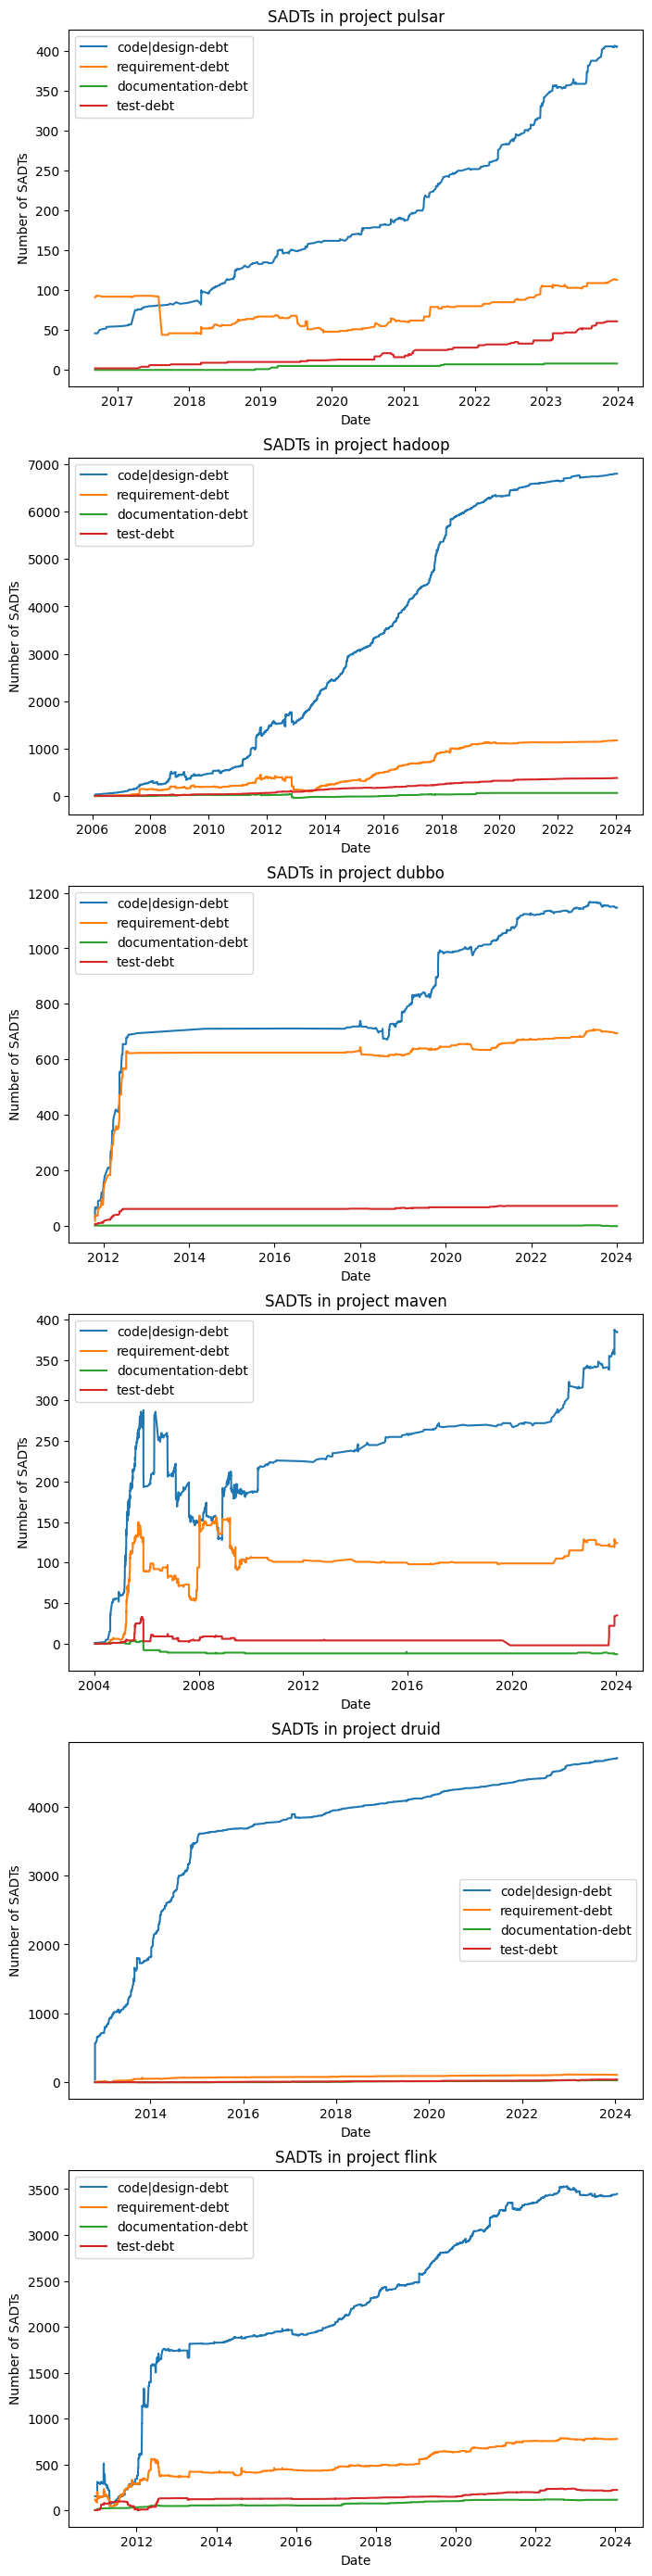

In [78]:
num_subplots = len(files)
num_rows = 1
# Create subplots using the subplots function
fig, axs = plt.subplots(int(num_subplots / num_rows), num_rows, figsize=(8, 35))

for idx, file in enumerate(files):
    name = file.split(".")[0].split("_")[0]
    df = pd.read_csv(f"{input_folder}/{file}")

    axs[idx].set_title(f"SADTs in project {name}")
    axs[idx].set_xlabel("Date")
    axs[idx].set_ylabel("Number of SADTs")
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    
    axs[idx].plot(df["date"], df["code|design-debt"].cumsum(), label="code|design-debt")
    axs[idx].plot(df["date"], df["requirement-debt"].cumsum(), label="requirement-debt")
    axs[idx].plot(df["date"], df["documentation-debt"].cumsum(), label="documentation-debt")
    axs[idx].plot(df["date"], df["test-debt"].cumsum(), label="test-debt")
    axs[idx].legend()

# Adjust layout

# Show the plot
plt.show()


# df["code|design-debt"]
# df["code|design-debt"].cumsum().plot()


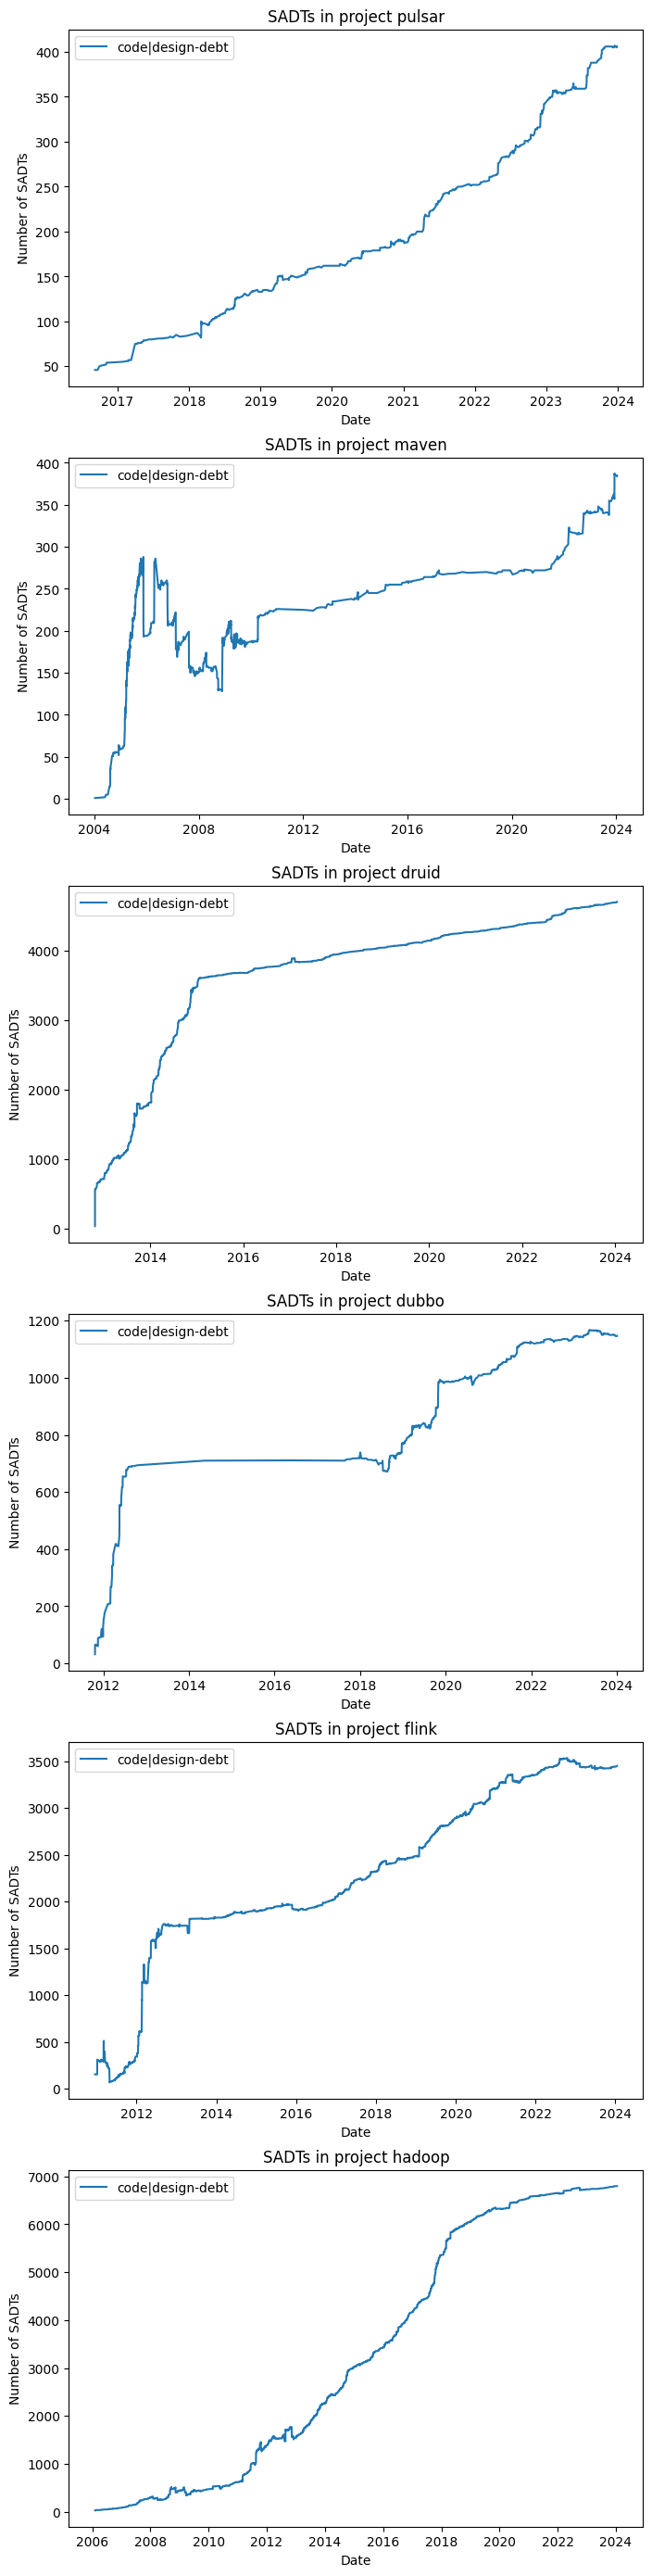

In [82]:
num_subplots = len(files)
num_rows = 1
# Create subplots using the subplots function
fig, axs = plt.subplots(int(num_subplots / num_rows), num_rows, figsize=(8, 35))

for idx, file in enumerate(files):
    name = file.split(".")[0].split("_")[0]
    df = pd.read_csv(f"generated/{file}")

    axs[idx].set_title(f"SADTs in project {name}")
    axs[idx].set_xlabel("Date")
    axs[idx].set_ylabel("Number of SADTs")
    # plt.plot(df["timestamp"], df["code|design-debt"].cumsum())
    df['date'] = pd.to_datetime(df['timestamp'], unit='s')
    axs[idx].plot(df["date"], df["code|design-debt"].cumsum(), label="code|design-debt")
    axs[idx].legend()

# Adjust layout

# Show the plot
plt.show()

/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()
/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()
/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()
/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()
/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timesta

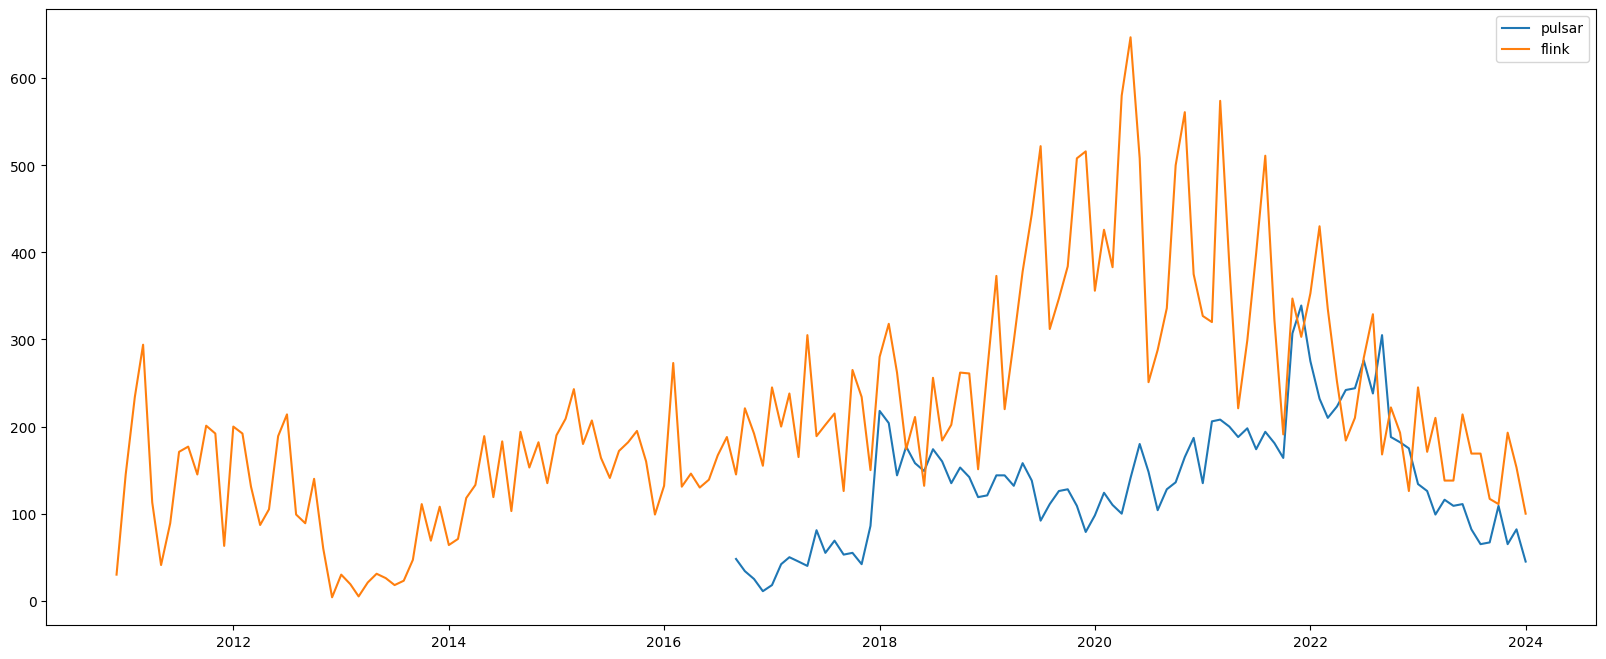

In [57]:
from pandas import DataFrame


def aggregate(df: DataFrame) -> DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    # df = df.set_index("date")
    df["date"] = df["date"].dt.normalize()
    # df["week_start"] = df["date"] - pd.to_timedelta(df["date"].dt.dayofmonth, unit='d')
    df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()
    
    return df.groupby('week_start').size().reset_index(name='number_commits')
    
df2 = aggregate(pd.read_csv("data/aggregated_commits/druid_aggregated.csv"))
df3 = aggregate(pd.read_csv("data/aggregated_commits/dubbo_aggregated.csv"))
df1 = aggregate(pd.read_csv("data/aggregated_commits/flink_aggregated.csv"))
df4 = aggregate(pd.read_csv("data/aggregated_commits/hadoop_aggregated.csv"))
df5 = aggregate(pd.read_csv("data/aggregated_commits/pulsar_aggregated.csv"))


plt.figure(figsize=(20, 8))
plt.plot(df5["week_start"], df5["number_commits"], label="pulsar")
plt.plot(df1["week_start"], df1["number_commits"], label="flink")
# plt.plot(df2["week_start"], df2["number_commits"], label="druid")
# plt.plot(df3["week_start"], df3["number_commits"], label="dubbo")
# plt.plot(df4["week_start"], df4["number_commits"], label="hadoop")
plt.legend()
plt.show()




/tmp/ipykernel_2854543/4178760675.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["week_start"] = df["date"].dt.to_period("M").dt.to_timestamp()


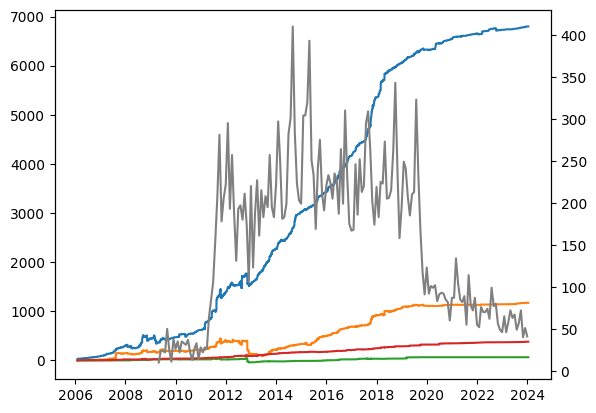

In [72]:
commit_frequency = aggregate(pd.read_csv("data/aggregated_commits/hadoop_aggregated.csv"))
technical_debt = pd.read_csv("data/aggregated/hadoop_aggregated.csv")
technical_debt["timestamp"] = pd.to_datetime(technical_debt["timestamp"], unit="s")

fig, ax1 = plt.subplots()

ax1.plot(technical_debt["timestamp"], technical_debt["code|design-debt"].cumsum(), label="requirement-debt")

ax1.plot(technical_debt["timestamp"], technical_debt["requirement-debt"].cumsum(), label="requirement-debt")
ax1.plot(technical_debt["timestamp"], technical_debt["documentation-debt"].cumsum(), label="documentation-debt")
ax1.plot(technical_debt["timestamp"], technical_debt["test-debt"].cumsum(), label="test-debt")

ax2 = ax1.twinx()

ax2.plot(commit_frequency["week_start"], commit_frequency["number_commits"], color="gray")

